### Import Packages


In [ ]:
import os
import csv
import numpy as np
from tqdm.notebook import tqdm

import matplotlib.pyplot as plt

import torch
import torchvision
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader

print(torch.__version__)

1.7.0+cu101


### Import your drive's contents!

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# Check if the drive has been mounted well.
# !ls ./drive -> What would happen?
model_dir = './drive/MyDrive/Codes/models'

Mounted at /content/drive


### MNIST dataset is provided in default

In [ ]:
train_path = './sample_data/mnist_train_small.csv'
test_path = './sample_data/mnist_test.csv'
img_size = 28

Current Device : cuda


### Choose your device - use GPU or not?

In [ ]:
# device = 'cpu'
device = 'cuda'
print('Current Device : {}'.format(device))

### Read the MNIST dataset
- total 1+ 28x28 dimension. 1 For Label, 28**2 for image


In [ ]:
def mnist_reader(file_path, img_size=img_size):
    total_img = list()
    total_label = list()
    with open(file_path) as csvfile:
        mnist_reader = csv.reader(csvfile)
        for row in tqdm(mnist_reader):
            img = np.array(row[1:], dtype=np.uint16).reshape(img_size, img_size)
            img = img / 255
            label = int(row[0])

            total_img.append(img)
            total_label.append(label)

    total_img = np.asarray(total_img)
    total_label = np.asarray(total_label)
    
    return total_img, total_label

In [ ]:
train_img, train_label = mnist_reader(train_path)
test_img, test_label = mnist_reader(test_path)

# Let's try to reduce the number of data we have.
train_img = ...
train_label = ...
test_img = ...
test_label = ...

### Define the Dataset

In [ ]:
class MNIST_Dataset(Dataset):
    def __init__(self, target_img, target_label):
        '''
        target_img : train/test images
        target_label : train/test images
        '''
        pass

    def __len__(self):
        pass
        
    def __getitem__(self, idx):
        pass

### Define the DataLoader

In [ ]:
batch_size = 256

# Define dataset instance for train/test
train_dataset = ...
test_dataset = ...

# Define dataloader for train/test
train_dataloader = ...
test_dataloader = ...

### Try to sample out one data point from dataloader

In [ ]:
sample = next(iter(test_dataloader))
# Check data's dimension!

torch.Size([1, 28, 28])
torch.Size([1])


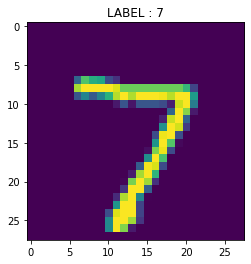

In [ ]:
# Try to plot the sample image
plt.imshow(...)
plt.title(...)
plt.show()

### Define the Multiple Layer Perceptrons

In [ ]:
class MLPs(nn.Module):
    def __init__(self, dim_hidden_1, dim_hidden_2, dim_input=img_size**2, dim_output=10):
        super(MLPs, self).__init__()
        # set network's size

        # Define Layers with Weight and bias

        # Define the activation function

    def forward(self, img):
        # Generate the result from input img
        pass

### Define the Model and optimizer

In [ ]:
# Define the Model, and put it to the device.

# Define the optimizer

MLPs(
  (layer_1): Linear(in_features=784, out_features=512, bias=True)
  (layer_2): Linear(in_features=512, out_features=256, bias=True)
  (layer_3): Linear(in_features=256, out_features=128, bias=True)
  (layer_4): Linear(in_features=128, out_features=10, bias=True)
  (activation): ReLU()
)


### Define functions for train/test

In [ ]:
def train(model, optimizer, sample):
    model.train()

    # Define the Loss
    criterion = ...
    
    # Clean up the Optimizer

    # Set Input and Output
    img = ...
    label = ...

    # Get prediction from the model    
    pred = model(img)

    # Calculate number of correct prediction.
    num_correct = sum(torch.argmax(pred, dim=1) == label)
    
    # Get the Loss from prediction and ground truth label
    pred_loss = ...

    # Get the gradient, and run optimizer for one step.
    pred_loss.backward()
    optimizer.step()

    return pred_loss.item(), num_correct.item()

In [ ]:
def test(model, sample):
    model.eval()

    # Define the Loss
    criterion = ...

    # Get the result without computing the gradient
    with torch.no_grad():
        # Set input and output
        img = ...
        label = ...

        # Get prediction from the model    
        pred = model(img)

        # Calculate number of correct prediction.
        num_correct = sum(torch.argmax(pred, dim=1) == label)

        # Get the Loss from prediction and ground truth label
        pred_loss = ...

    return pred_loss.item(), num_correct.item()

### Run Training

In [ ]:
max_epoch = 500
tmp_path = './checkpoint.pth'

for epoch in tqdm(range(max_epoch)):        
    ###Train Phase
    
    # Initialize Loss and Accuracy
    train_loss = 0.0
    train_accu = 0.0

    # Iterate over the train_dataloader
    for idx, sample in enumerate(train_dataloader):
        curr_loss, num_correct = train(model, optimizer, sample)
        train_loss += curr_loss / len(train_dataloader)
        train_accu += num_correct / len(train_dataset)

    # Try to save the model to your drive
    torch.save(model.state_dict(), os.path.join(model_dir, 'recent.pth'))
    
    ### Test Phase
    # Initialize Loss and Accuracy
    test_loss = 0.0
    test_accu = 0.0

    # Iterate over the test_dataloader
    for idx, sample in enumerate(test_dataloader):
        curr_loss, num_correct = test(model, sample)
        test_loss += curr_loss / len(test_dataloader)
        test_accu += num_correct / len(test_dataloader)
